Código para Prever a Nota (vote_average) com XGBoost

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import re

Arquivo 'filtragens_rodrigo.csv' carregado com sucesso. Total de 11277 filmes.
Dados divididos em 9021 amostras de treino e 2256 de teste.

Iniciando o treinamento do modelo para prever a NOTA do filme...
Treinamento concluído!

O RMSE do modelo é: 0.8021
Isso significa que, em média, as previsões de nota do modelo (numa escala de 1 a 10) erram por este valor.


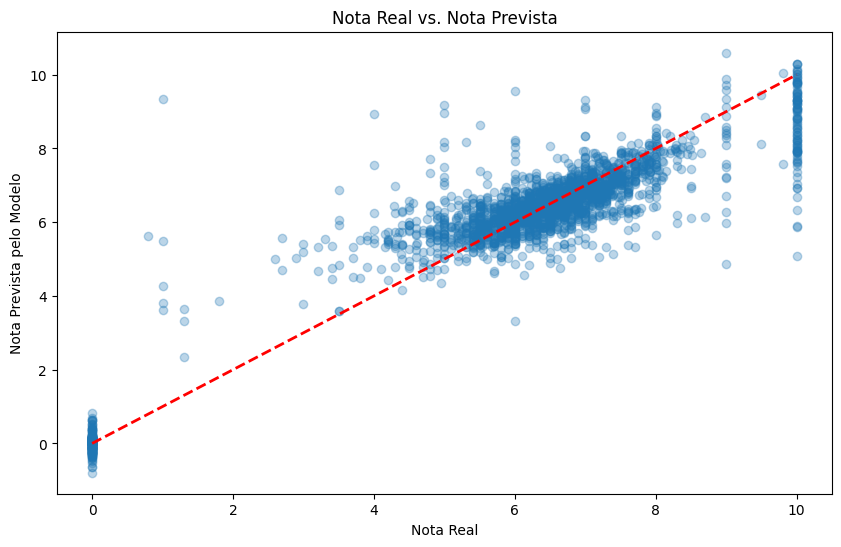

In [3]:
try:
    df = pd.read_csv('filtragens_rodrigo.csv')
    print(f"Arquivo 'filtragens_rodrigo.csv' carregado com sucesso. Total de {len(df)} filmes.")
except FileNotFoundError:
    print("ERRO: Arquivo 'filtragens_rodrigo.csv' não encontrado. Verifique o nome e a localização do arquivo.")
    exit()

# O alvo (y) é a nota média.
y = df['vote_average']

# Features (X) são todas as colunas úteis, exceto o próprio alvo
colunas_para_remover = [
    'vote_average', 'id', 'title', 'original_language', 'overview', 'production_companies',
    'release_date', 'status', 'tagline', 'credits', 'keywords', 'poster_path',
    'backdrop_path', 'recommendations'
]

X = df.drop(columns=colunas_para_remover, errors='ignore').copy()
X.columns = [re.sub(r'\[|\]|<', '', col) for col in X.columns]


# 80% dos dados para o modelo aprender, 20% para testar sua performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.")


print("\nIniciando o treinamento do modelo para prever a NOTA do filme...")
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',
                           n_estimators=1000,
                           learning_rate=0.05,
                           max_depth=5,          
                           subsample=0.8,       
                           n_jobs=-1)

xgb_reg.fit(X_train, y_train)
print("Treinamento concluído!")

# --- Passo 5: Fazer Predições e Avaliar o Modelo ---
predictions = xgb_reg.predict(X_test)

# Calcular o RMSE.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"\nO RMSE do modelo é: {rmse:.4f}")
print("Isso significa que, em média, as previsões de nota do modelo (numa escala de 1 a 10) erram por este valor.")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Nota Real")
plt.ylabel("Nota Prevista pelo Modelo")
plt.title("Nota Real vs. Nota Prevista")
plt.show()